In [6]:
import random
import re
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
from scipy.stats import randint, uniform
from sklearn.linear_model import HuberRegressor
from tqdm import tqdm, trange

plt.style.use("science")

In [7]:
mappings = ["Logarithmic", "Algebraic", "Exponential"]

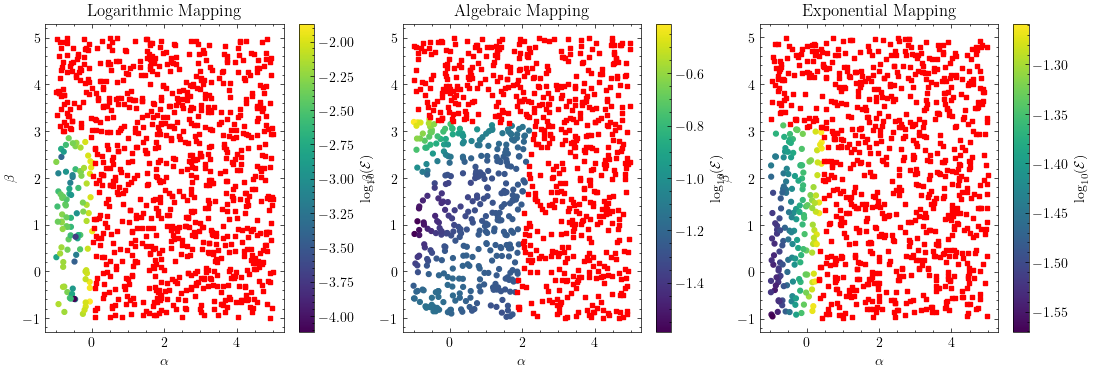

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for myind, Pattern in enumerate(["1", "2", "3"]):
    index = int("5" in Pattern)
    # Read the text file
    with open("runs-random-only-ab-%s" % Pattern, "r") as f:
        lines = f.readlines()

    # Define regular expressions to extract values from each line
    pattern = r"\[([-0-9.e+, ]+)\] ([0-9.e+-]+)"

    data = []

    # Extract data from each line using regular expressions
    for line in lines:
        match = re.match(pattern, line)
        if match:
            values = [float(x) for x in match.group(1).split(", ")]
            target = float(match.group(2))
            data.append(values + [target])

    columns = ["L", "mapping", "alpha", "beta", "lmbda", "err"]
    df = pd.DataFrame(data, columns=columns)

    X = df[["alpha", "beta"]].to_numpy()
    Z = df["err"].to_numpy()

    indx = Z < 100
    Xc = X[indx]
    Zc = Z[indx]

    Xe = X[~indx]
    Ze = Z[~indx]
    ax = axes[myind]

    sc = ax.scatter(Xc[:, 0], Xc[:, 1], c=np.log10(Zc), cmap="viridis", s=12)
    
    fig.colorbar(sc, label=r"$\log_{10}(\mathcal{E})$")
    sc = ax.scatter(Xe[:, 0], Xe[:, 1], c="red", marker="s", s=6)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\beta$")
    ax.set_title("%10s Mapping" % (mappings[int(Pattern) - 1],))

fig.savefig("kidder-hyperspace-alpha-beta.pdf", bbox_inches="tight")
fig.subplots_adjust(right=0.8)

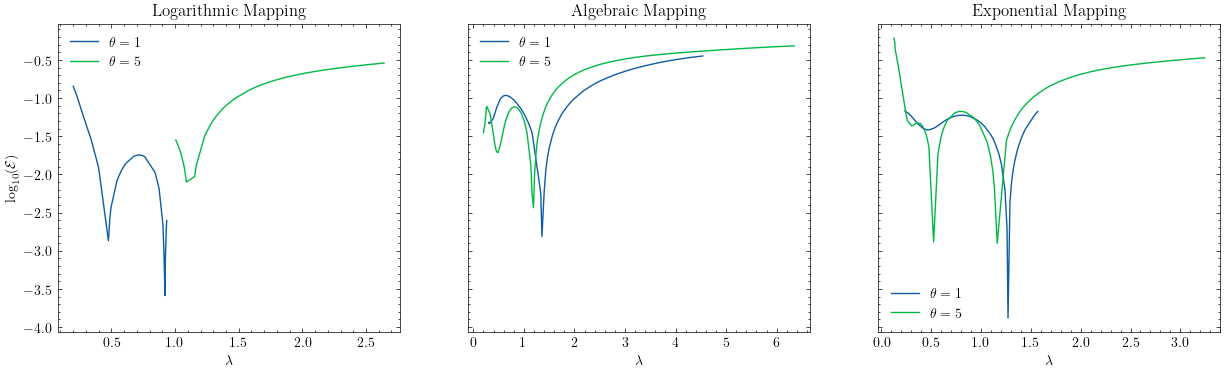

In [9]:
Patterns = ["x1-1", "y1-2", "z1-3", "x5-1", "y5-2", "z5-3"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
for Pattern in Patterns:
    index = Pattern[0]
    Pattern = Pattern[1:]
    index = {"x": 0, "y": 1, "z": 2}[index]
    # Read the text file
    with open("runs-random-only-lambda-" + Pattern, "r") as f:
        lines = f.readlines()

    # Define regular expressions to extract values from each line
    pattern = r"\[([-0-9.e+, ]+)\] ([0-9.e+-]+)"

    data = []

    # Extract data from each line using regular expressions
    for line in lines:
        match = re.match(pattern, line)
        if match:
            values = [float(x) for x in match.group(1).split(", ")]
            target = float(match.group(2))
            data.append(values + [target])

    # Create a DataFrame
    columns = ["L", "mapping", "alpha", "beta", "lmbda", "err"]
    df = pd.DataFrame(data, columns=columns)

    X = df[["alpha", "beta"]].to_numpy()
    Z = df["err"].to_numpy()

    indx = Z < 100 
    Xc = X[indx]
    Zc = Z[indx]

    Xe = X[~indx]
    Ze = Z[~indx]

    col = "lmbda"
    df2 = df.sort_values(col).iloc[:500, :]

    df2 = df2[df2.err < 100]
    smooth = lambda x, t: x

    axes[index].plot(
        df2[col],
        np.log10(smooth(df2["err"], 2)),
        label=r"$\theta=%s$" % tuple(Pattern.split("-")[0]),
    )
    axes[index].set_xlabel("$\lambda$")
    axes[index].legend()
    axes[index].set_title("%10s Mapping" % (mappings[int(Pattern.split("-")[1]) - 1],))
axes[0].set_ylabel(r"$\log_{10}(\mathcal{E})$")

fig.savefig("kidder-hyperspace-lambda.pdf", bbox_inches="tight")

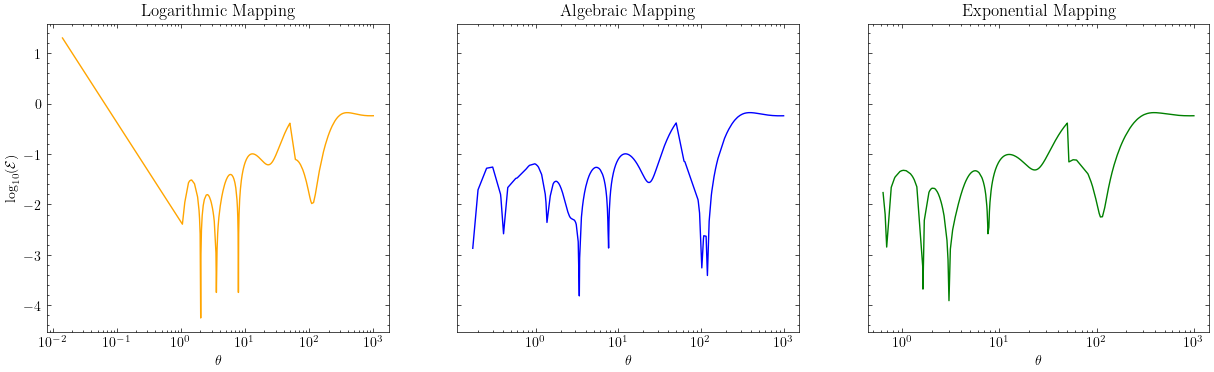

In [10]:
colors = ["orange", "b", "g"]
Patterns = ["1", "2", "3"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
for myind, Pattern in enumerate(Patterns):
    index = int("5" in Pattern)
    # Read the text file
    with open("runs-random-only-L-" + Pattern, "r") as f:
        lines = f.readlines()

    # Define regular expressions to extract values from each line
    pattern = r"\[([-0-9.e+, ]+)\] ([0-9.e+-]+)"

    data = []

    # Extract data from each line using regular expressions
    for line in lines:
        match = re.match(pattern, line)
        if match:
            values = [float(x) for x in match.group(1).split(", ")]
            target = float(match.group(2))
            data.append(values + [target])

    # Create a DataFrame
    columns = ["L", "mapping", "alpha", "beta", "lmbda", "err"]
    df = pd.DataFrame(data, columns=columns)

    X = df[["alpha", "beta"]].to_numpy()
    Z = df["err"].to_numpy()

    indx = Z < 100
    Xc = X[indx]
    Zc = Z[indx]

    Xe = X[~indx]
    Ze = Z[~indx]

    col = "L"
    df2 = df.sort_values(col).iloc[:, :]
    df2 = df2[df2.err < 100]
    ax = axes[myind]

    smooth = lambda x, t: x

    ax.plot(df2[col], (np.log10(smooth(df2["err"], 6))), color=colors[myind])
    ax.set_xscale("log")
    ax.set_xlabel(r"$\theta$")
    # ax.legend()
    ax.set_title("%s Mapping" % (mappings[int(Pattern) - 1],))
axes[0].set_ylabel(r"$\log_{10}(\mathcal{E})$")

fig.savefig("kidder-hyperspace-theta.pdf", bbox_inches="tight")